# 수치 미분 구현

In [1]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

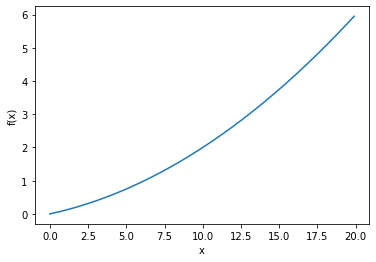

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [3]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [4]:
numerical_diff(function_1, 5)

0.1999999999990898

In [5]:
numerical_diff(function_1, 10)

0.2999999999986347

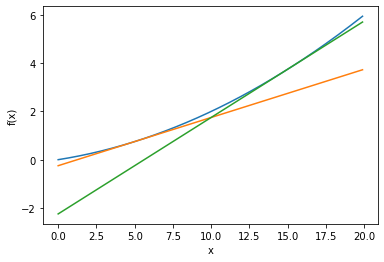

In [6]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)

x1 = 5
y1 = numerical_diff(function_1, x1) * (x - x1) + function_1(x1)
plt.plot(x, y1)

x2 = 15
y2 = numerical_diff(function_1, x2) * (x - x2) + function_1(x2)
plt.plot(x, y2)

plt.show()

In [7]:
def function_2(x):
  return x[0]**2 + x[1]**2
  # return np.sum(x**2)

In [8]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라
def function_tmp1(x0):
  return x0*x0 + 4.0**2

In [9]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [10]:
def function_tmp2(x1):
  return 3.0**2 + x1*x1

In [11]:
numerical_diff(function_tmp2, 4)

7.999999999999119

# 편미분 구현

In [12]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 같은 shape 배열 형성

  for idx in range(x.size):
    tmp_val = x[idx]

    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

In [13]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [14]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [15]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

# 경사 하강법 구현

In [16]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr*grad
  return x

In [17]:
init_x = np.array([-3.0, 4.0])
x = gradient_descent(function_2, init_x, lr=0.1)
x

array([-6.11110793e-10,  8.14814391e-10])

In [18]:
function_2(x)

1.0373788922158197e-18

In [19]:
init_x = np.array([3.0, 4.0])
numerical_gradient(function_2, x)

array([-1.22222159e-09,  1.62962878e-09])

In [20]:
init_x = np.array([3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0)

array([ 2.58983747e+13, -1.29524862e+12])

In [21]:
init_x = np.array([3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10)

array([2.99999994, 3.99999992])

손실함수를 각각의 가중치에 대해 편미분 ==> 기울기를 얻는다.   
교재 코드 ch04/gradient_simplenet.py 참고

In [22]:
def softmax(x):
  c = np.max(x)
  exp_x = np.exp(x - c)
  sum_exp_x = np.sum(exp_x)
  return exp_x / sum_exp_x

In [23]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return np.sum(-t * np.log(y+delta))

In [24]:
def sigmoid(x):
  return 1 / (1 - np.exp(-x))

In [25]:
class SimpleNet:
  def __init__(self):
    self.w = np.random.randn(2, 3) # 정규분포로 가중치 초기화. 2x3 형태.
  
  def predict(self, x):
    return np.dot(x, self.w)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [26]:
net = SimpleNet()
print(net.w)

[[ 0.72972999 -0.67924787  0.51733767]
 [ 0.60755294 -0.69092747  1.72078234]]


In [27]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.98463564 -1.02938345  1.85910671]


In [28]:
np.argmax(p)

2

In [29]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.3871263360006487

In [30]:
def f(w):
  return net.loss(x, t)

np.nditer 참고   
https://numpy.org/doc/stable/reference/generated/numpy.nditer.html

In [31]:
def numerical_gradient_general(f, x): # numerical_gradient(f, x)에서 x를 다차원 배열로 받을 수 있도록 수정.
  h = 1e-4
  grad = np.zeros_like(x)

  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
      idx = it.multi_index
      tmp_val = x[idx]

      # f(x+h)
      x[idx] = tmp_val + h
      fxh1 = f(x[idx])

      # f(x-h)
      x[idx] = tmp_val - h
      fxh2 = f(x[idx])

      grad[idx] = (fxh1 - fxh2) / (2 * h)
          
      x[idx] = tmp_val
      it.iternext()

  return grad

In [35]:
dw = numerical_gradient_general(f, net.w)
# numerical_gradient_general에서 x 파라미터에 net.w 가 들어가고, net.w의 요소를 각각 변화시켜가며 손실함수를 미분값을 계산
# f(w) 에서 w는 더미값이지만, net.loss(x, t)를 호출한다. 
# net.loss(x,t) 에서는 x@self.w 연산이 들어간다. (self.w == net.w)
# 따라서 numerical_gradient_general에서 net.w를 변화시키면 net.loss(x, t)의 값 또한 달라짐. 
# 즉, w는 net.loss의 독립변수이므로, numerical_gradient_general에서 w에 대한 loss의 편미분 벡터(gradient)를 계산할 수 있다.
print(dw)

[[ 0.16992072  0.02267613 -0.19259685]
 [ 0.25488108  0.0340142  -0.28889527]]


# 학습 알고리즘 구현하기
## 전제
신경망에는 적응 가능한 가중치와 bias 값이 있고, 이들을 훈련데이터에 적응하도록 조정하는 과정을 '학습'이라고 함.
### 신경망 학습 절차
1. 미니배치
  - 훈련 데이터 중 일부를 무작위로 가져옴.
2. 기울기 산출
3. 매개변수(가중치 및 bias) 갱신
4. 반복
  - 1~3 단계 반복

- 이를 확률적 경사 하강법(stochastic gradient descent)라고 한다. 
  - 데이터를 미니배치로 무작위로 선정하기 때문.
  -  딥러닝 framework에서는 SGD라는 함수로 구현되어 있다.

In [36]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화
    self.params = {}
    self.params['w1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['w2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
  
  def predict(self, x):
    w1, w2 = self.params['w1'], self.params['w2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    y = softmax(a2)
    
    return y
  
  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_w = lambda w : self.loss(x, t)

    grads = {}
    grads['w1'] = numerical_gradient_general(loss_w, self.params['w1'])
    grads['b1'] = numerical_gradient_general(loss_w, self.params['b1'])
    grads['w2'] = numerical_gradient_general(loss_w, self.params['w2'])
    grads['b2'] = numerical_gradient_general(loss_w, self.params['b2'])

    return grads

In [37]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['w1'].shape)
print(net.params['b1'].shape)
print(net.params['w2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [38]:
x = np.random.rand(100, 784)
y = net.predict(x)
y.shape

(100, 10)

In [39]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t) # 이게 3분이나 걸리네.... 다음장에서 이를 개선한 gradient(self, x, t) 구현할 예정.

print(grads['w1'].shape)
print(grads['b1'].shape)
print(grads['w2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
cd drive/MyDrive/Colab Notebooks/ML-Study/ML-Study/DeepLearning/dataset

/content/drive/MyDrive/Colab Notebooks/ML-Study/ML-Study/DeepLearning/dataset


In [42]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# hyper-parameters
iters_num = 10 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
input_size = x_train.shape[1]
output_size = t_train.shape[1]

# 1 epoch 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=input_size, hidden_size=50, output_size=output_size)

for i in range(iters_num):
  # 미니배치 얻기
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # calculate gradient 
  grad = network.numerical_gradient(x_batch, t_batch) # 너무 오래 걸려....

  # update parameters
  for key in ('w1', 'b1', 'w2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # 1 epoch 당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train_acc, test_acc |" + str(train_acc) + ", " + str(test_acc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


train_acc, test_acc |0.09871666666666666, 0.098


KeyboardInterrupt: ignored

얘도 정확도 억까하는 걸 보니 내가 잘못한게 아닌거 같은데...?